In [ ]:
# Se importan las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Se crea un DataFrame a partir de la base de datos de excel proporcionada
df = pd.read_excel("Mexico GDP.xlsx")
df

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
...,...,...
57,2017,1.158913e+12
58,2018,1.222408e+12
59,2019,1.269404e+12
60,2020,1.087118e+12


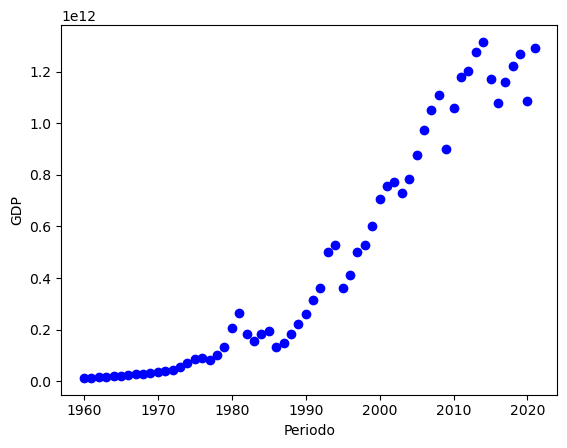

In [ ]:
# Se almacenan los datos de X y Y en variables como arrays
x_data = np.array(df.Periodo)
y_data = np.array(df.GDP)

#Se crea una gráfica para poder visualizar dichos datos
plt.plot(x_data, y_data, 'bo')
plt.xlabel('Periodo')
plt.ylabel('GDP')
plt.show()

In [ ]:
# Se crea una máscara que va a dividir los datos entre el 80% y 20%
msk = np.random.rand(len(df)) <= 0.8

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True])

In [ ]:
# Se crean las variables enmascaradas de X y Y tanto para Train como para Test
train_x = x_data[msk]
train_y = y_data[msk]
test_x = x_data[~msk]
test_y = y_data[~msk]

In [ ]:
# Se define la función sigmoidal
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(beta_1 * (x - beta_2)))
    return y

In [ ]:
# Se realiza primer intento para obtener beta_1 y beta_2
# Falla el proceso, creo que fue debido a la notación científica
popt, pcov = curve_fit(sigmoid, train_x, train_y)

C:\Users\crowb\AppData\Local\Temp\ipykernel_27444\736875862.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(beta_1 * (x - beta_2)))
C:\Users\crowb\AppData\Local\Temp\ipykernel_27444\632781303.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(sigmoid, train_x, train_y)


In [ ]:
# Se normaliza la base de datos
# Dividimos cada entrada entre el valor máximo de su columna
df_normalized = df / df.max()
df_normalized

,Periodo,GDP
0,0.969817,0.009914
1,0.970312,0.010765
2,0.970807,0.011556
3,0.971301,0.012894
4,0.971796,0.015266
...,...,...
57,0.998021,0.881067
58,0.998516,0.929340
59,0.999010,0.965069
60,0.999505,0.826485


In [ ]:
# Se almacenan los datos normalizados como arrays en variables diferentes
# Se vuelven a definir variables enmascaradas con los datos ya normalizados
x_normalized = np.array(df_normalized.Periodo)
y_normalized = np.array(df_normalized.GDP)
train_x = x_normalized[msk]
train_y = y_normalized[msk]
test_x = x_normalized[~msk]
test_y = y_normalized[~msk]

In [ ]:
# Segundo intento para obtener beta_0 y beta_1 con datos normalizados
# Obtenemos los resultados exitosamente
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print('Beta 1: ', popt[0])
print('Beta 2: ', popt[1])

Beta 1:  -270.9946846568431
Beta 2:  0.9892096769727245


In [ ]:
# Predicción utilizando los datos de test, beta_1 y beta_2
y_hat = sigmoid(test_x, popt[0], popt[1])

In [ ]:
# Se importa una librería que permite calcular el r2-Score
# Se calculan las métricas correspindientes
from sklearn.metrics import r2_score
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_hat - test_y)) ** 2)
print('R2-score: %.2f' % r2_score(y_hat, test_y))

""" Conclusiones
El error absoluto medio es muy bajo, lo que indica que no varía casi nada
la predicción de los datos de prueba.
El error cuadrático medio es de 0, indicando técnicamente que no hay
penalización.
El coeficiente de determinación es de 0.99, indicando el nivel de precisión
del modelo, es casi perfecto. """

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.99


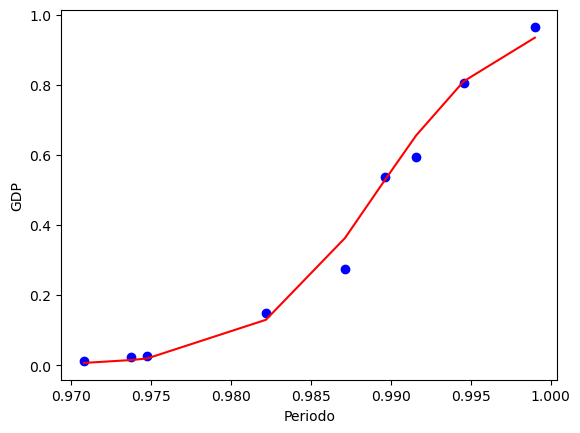

In [ ]:
# Se realizan los gráficos correspondientes
# Se comparan tanto los valores de prueba de Y, así como los de predicción
plt.plot(test_x, test_y, 'bo')
plt.plot(test_x, y_hat, 'r')
plt.xlabel('Periodo')
plt.ylabel('GDP')
plt.show()

In [ ]:
# Se utiliza el modelo para predecir el PIB del año 2022
# Primero se Normaliza el dato 2022
x_normalized_2022 = 2022 / df.Periodo.max()
#introducimos el dato normalizado en el modelo
predict_2022_gdp_normalized = sigmoid(x_normalized_2022, popt[0], popt[1])
# Utilizamos un proceso llamado Desnormalización, operación inversa a Normalización
# Se multiplica el dato normalizado por el dato mayor de su columna (Periodo)
predict_2022_gdp = predict_2022_gdp_normalized * df.GDP.max()
#Imprimimos el resultado en notación científica, como los datos originales
print(f'PIB para el año 2022: {predict_2022_gdp:.6e}')

PIB para el año 2022: 1.256339e+12
